In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

from numpy import random 
random.seed(42)
df = pd.read_csv('../data/BirthWeights.csv')
boys=df[df.gender == 'male'].dbirwt
girls=df[df.gender == 'female'].dbirwt
df.head()

,Unnamed: 0,gender,dbirwt
0,1,male,2551
1,2,male,2778
2,3,female,2976
3,4,female,3345
4,5,female,3175


#### 1. Describe what the following code would achieve

(Fill in each comment)

In [ ]:
#
df = df[np.logical_and(df.dbirwt > 500, df.dbirwt < 8000)]
#
n=30
#
gender_iter = ['male', 'female']

#
columns = ['gender', 'dbirwt']
df_new = pd.DataFrame(columns=columns)

#
std_dev = np.empty(2)

#
for ind,v in enumerate(gender_iter):
    subset = df[df.gender == v]

    #
    for i in range(M):
        rand_samples = np.random.choice(subset.dbirwt, n)
        x = np.mean(rand_samples)
        df_new.loc[len(df_new)+1] = [v, x]

    #
    plot_data = df_new[df_new.gender == v]
    std_dev[ind] = np.std(plot_data['dbirwt'])  
    #
    plot_data.dbirwt.plot.density()
    plt.xlabel('dbirwt')
    plt.legend(gender_iter)


#### 2a. What does the following function compute
#### 2b. Describe various use cases

In [ ]:
def do_sth_1(data, func, size=1):

    # Initialize array 
    x = np.empty(size)

    # Generate sth:
    for i in range(size):
        x[i] = func(np.random.choice(data, size=len(data)))

    return x

#### 3a. What does the following function compute
#### 3b. Describe various use cases

In [ ]:
def do_sth_2(data):

    # Number of data points: n
    n = len(data)
    # 
    x = np.sort(data)
    # 
    y = np.arange(1, n+1) / n
    return x, y

In [ ]:
#What does this plot show
data2 = do_sth_1(boys, np.std, size=1000)
x,y = do_sth_2(data2)
_ = plt.plot(x,y, marker = '.', linestyle = 'none')

#### 4a. What does the following code achieve
#### 4b. Give the last 2 objects appropriate, official names

In [ ]:
#
ed = np.mean(boys) - np.mean(girls)
#
gm = np.mean(df.dbirwt)
#
boys_shifted = boys - np.mean(boys) + gm
girls_shifted = girls - np.mean(girls) + gm
#
bs_b = do_sth_1(boys_shifted,np.mean,100000)
bs_g = do_sth_1(girls_shifted,np.mean,100000)
#
bs_d = bs_b - bs_g

#Give the following an appropriate, official name:
np.mean(bs_d >=ed)

#Give the following an appropriate, official name:
[np.percentile(bs_d,5), np.percentile(bs_d,95) ]

#### 5a. Assume a click probability $p=0.01$ for a certain advertisement. In two campaigns of sizes $(1000,4000)$ respectively,  compute the probabilities that less than 0.75% of the respective ads are "clicked on". (write down the analytic expressions and pseudo code)
#### 5b. What would be the normal approximation for the above
#### 5c. Explain the relationship of the questions above to the following graph

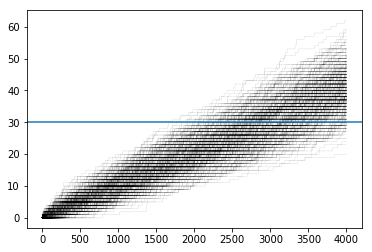

In [4]:
draws = np.random.uniform(0, 1, size=(500, 4000)) 
steps = np.where(draws <= 0.01, 1, 0)
walks = steps.cumsum(1)
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
for i in range(1,500):
    ax.plot(walks[i,:], 'k', linewidth=0.25, alpha=0.25)
ax.axhline(30)

In [6]:
np.mean(walks[:,4000-1]<30)

0.048

#### 6a. Titanic Linear Regression
* Compute the estimated survival probability for the first 2 rows in the Titanic data set "by hand".
* Explain the precise meaning of all coefficients.
* Test the hypothesis that age did not matter for survival.

In [8]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
est = smf.ols('survived ~ age  + C(sex) +C(pclass) ', titanic).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.1250,0.051,22.202,0.000,1.026,1.225
C(sex)[T.male],-0.4795,0.031,-15.608,0.000,-0.540,-0.419
C(pclass)[T.2],-0.2077,0.042,-4.983,0.000,-0.290,-0.126
C(pclass)[T.3],-0.4066,0.038,-10.620,0.000,-0.482,-0.331
age,-0.0055,0.001,-5.039,0.000,-0.008,-0.003


#### 6b. Titanic Logistic Regression

* Discuss the shortcomings of linear regression for classification tasks such as binary prediction.
* Plot and explain the **sigmoidal** function $s(z) = 1/(1+exp(-z))$
* Plot and explain the **logit** function.
* Explain **log odds** and their relationship to logistic regression
* Compute the estimated survival probability for the first 2 rows in the Titanic data set "by hand".
* Explain the precise meaning of all coefficients.

In [22]:
log_reg = smf.logit('survived ~  C(pclass) + C(sex)', data=titanic)
log_reg.fit().summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.464023
         Iterations 6


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,2.2971,0.219,10.490,0.000,1.868,2.726
C(pclass)[T.2],-0.8380,0.245,-3.424,0.001,-1.318,-0.358
C(pclass)[T.3],-1.9055,0.214,-8.898,0.000,-2.325,-1.486
C(sex)[T.male],-2.6419,0.184,-14.350,0.000,-3.003,-2.281


#### 7 General Learning Theory

* What are the "model flexibility" parameters for 
    * k nearest neighbors
    * linear regression
    * L1, L2 regression and elastic net
    * trees
    * random forests
* Which modeling methods can deal with *missing values* ?
* Discuss common methods of dealing with *missing values*.
* Which modeling methods benefit from "scaling" all predictors?
* When might you want to transform your y-variable (log, sqrt, ..)?
* Explain the bias/variance tradeoff
    * Discuss the various "signal/noise" settings 
* Explain *bagging*
* Explain *dummy coding*
* Explain and (draw a picture for) *cross validation*.
* What are *interaction terms* ?
* What are type-I/type-II errors?
* Given the following classification predictions for various thresholds, draw an ROC curve:

In [23]:
y_pred = log_reg.fit().predict() 
#y_pred_prob = y_pred[:,1]
pd.crosstab(y_pred>0.5,titanic.survived) 

Optimization terminated successfully.
         Current function value: 0.464023
         Iterations 6


survived,0,1
row_0,,
False,468,109
True,81,233


#### 8 Penalized Regression

Exercises 6.8 from ISLR book

* 2
* 3
* 4


#### 9 Trees

We fit the following (pruned) tree on the Titanic data:
![](../Lessons/figures/TitanicTreePruned.png)

The confusion matrix w.r.t. to passenger class for node 5 is
![](../Lessons/figures/ConfMatrixTitanicTreeNode5.png)


* Would you split node 5 further ? Compute the Gini index for each of the two children, where the left split contains Pclass 1 and 2 and the right split Pclass 3. Compare with Gini index of node 5.  

* Our main textbook defines the true positive rate (TPR) as the fraction of true positives over the total number of actual positivess in the data. Compute the TPR for the tree if we employ a threshold of $0.5$. (We naturally define "Survived" as the positive event!)

![](../Lessons/figures/ConfMatrixTitanicTreeNodePreds.png)

In [24]:
#[[460,89][93,249]]

TypeError: list indices must be integers or slices, not tuple